<a href="https://colab.research.google.com/github/MattJCR/Churn_red_neuronal/blob/master/Churn_red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Obtención del dataset
import urllib.request
import tempfile
import pandas as pd

# URL del archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/MattJCR/Churn_red_neuronal/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Descargar el archivo CSV
response = urllib.request.urlopen(url)

# Crear un archivo temporal para guardar el archivo CSV descargado
temp = tempfile.NamedTemporaryFile()

# Escribir los datos descargados en el archivo temporal
temp.write(response.read())

# Mover el puntero al inicio del archivo
temp.seek(0)

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(temp)

# Cerrar el archivo temporal
temp.close()

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Preparación de los datos

In [2]:
print(len(df))
df.head().T

7043


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)
df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,0.0
753,3115-CZMZD,0.0
936,5709-LVOEQ,0.0
1082,4367-NUYAO,0.0
1340,1371-DWPAZ,0.0
3331,7644-OMVMY,0.0
3826,3213-VVOLG,0.0
4380,2520-SGTTA,0.0
5218,2923-ARZLG,0.0
6670,4075-WKNIU,0.0


In [5]:
replacer = lambda str: str.lower().str.replace(' ', '_')
df.columns = replacer(df.columns.str)
for col in list(df.dtypes[df.dtypes == 'object'].index):
    df[col] = replacer(df[col].str)
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
df.churn = (df.churn == 'yes').astype(int)
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [7]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
                'phoneservice', 'multiplelines', 'internetservice',
                'onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport', 'streamingtv', 'streamingmovies',
                'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']
df[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=0)

df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=0)
y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

df_train.head().T

,6068,3611,4793,1737,1534
customerid,3945-gfwql,5693-pipcs,2284-vflkh,8887-ipqnc,7876-dnyap
gender,female,male,male,female,female
seniorcitizen,0,0,0,0,0
partner,no,no,yes,yes,yes
dependents,yes,no,no,no,yes
tenure,12,41,49,7,69
phoneservice,yes,yes,yes,yes,yes
multiplelines,no,no,no,no,no
internetservice,dsl,fiber_optic,fiber_optic,dsl,no
onlinesecurity,no,no,no,no,no_internet_service


# Análisis de la importancia de las propiedades

In [9]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.266

In [10]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print(round(female_mean, 3))
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print(round(male_mean, 3))

0.273
0.26


In [11]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print(round(partner_yes, 3))
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print(round(partner_no, 3))

0.198
0.331


In [12]:
from sklearn.metrics import mutual_info_score

calculate_mi = lambda col: mutual_info_score(col, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.101598
onlinesecurity,0.062598
techsupport,0.062494
internetservice,0.054856
onlinebackup,0.049249
paymentmethod,0.047916
deviceprotection,0.042962
streamingmovies,0.031053
streamingtv,0.030457
paperlessbilling,0.019033


In [13]:
print(df_train_full[numerical].corrwith(df_train_full.churn))

print(round(df_train_full[df_train_full.tenure <= 2].churn.mean(), 3))
print(round(df_train_full[(df_train_full.tenure > 3) & 
                          (df_train_full.tenure <= 12)].churn.mean(), 3))
print(round(df_train_full[df_train_full.tenure > 12].churn.mean(), 3))

print(round(df_train_full[df_train_full.monthlycharges < 20].churn.mean(), 3))
print(round(df_train_full[(df_train_full.monthlycharges > 21) & 
                          (df_train_full.monthlycharges <= 50)].churn.mean(), 3))
print(round(df_train_full[df_train_full.monthlycharges > 50].churn.mean(), 3))

tenure           -0.362305
monthlycharges    0.190375
totalcharges     -0.208863
dtype: float64
0.598
0.397
0.168
0.089
0.222
0.319


# Ingeniería de propiedades

In [14]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
dict(sorted(train_dict[0].items()))

{'contract': 'month-to-month',
 'dependents': 'yes',
 'deviceprotection': 'no',
 'gender': 'female',
 'internetservice': 'dsl',
 'monthlycharges': 44.55,
 'multiplelines': 'no',
 'onlinebackup': 'no',
 'onlinesecurity': 'no',
 'paperlessbilling': 'yes',
 'partner': 'no',
 'paymentmethod': 'electronic_check',
 'phoneservice': 'yes',
 'seniorcitizen': 0,
 'streamingmovies': 'no',
 'streamingtv': 'no',
 'techsupport': 'no',
 'tenure': 12,
 'totalcharges': 480.6}

In [15]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [16]:
X_train = dv.transform(train_dict)
X_train[0]

array([  1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   1.  ,   0.  ,   0.  ,  44.55,   1.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,
         1.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   0.  ,  12.  , 480.6 ])

In [17]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

# Entrenamiento del modelo

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [19]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)
y_pred

array([[0.63878177, 0.36121823],
       [0.98322246, 0.01677754],
       [0.80074488, 0.19925512],
       ...,
       [0.8553353 , 0.1446647 ],
       [0.99427579, 0.00572421],
       [0.3700468 , 0.6299532 ]])

In [20]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.36121823, 0.01677754, 0.19925512, ..., 0.1446647 , 0.00572421,
       0.6299532 ])

In [21]:
churn = y_pred >= 0.5
churn

array([False, False, False, ..., False, False,  True])

In [22]:
# precisión del modelo con los datos de entrenamiento
round((y_val == churn).mean(), 3) 

0.802

# Modelo

In [23]:
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)
y_pred

array([[0.63878177, 0.36121823],
       [0.98322246, 0.01677754],
       [0.80074488, 0.19925512],
       ...,
       [0.8553353 , 0.1446647 ],
       [0.99427579, 0.00572421],
       [0.3700468 , 0.6299532 ]])

# IMPLEMENTACIÓN DE KERAS

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Definimos el modelo de Keras
model = Sequential()
input_shape = len(X_train[0])
print('Numero de entradas:',input_shape)

model.add(Dense(int(len(X_train[0])), input_shape=(input_shape,), activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(int(len(X_train[0])/2), activation='relu',kernel_initializer='he_uniform'))

# model.add(Dense((len(X_train[0])/2)/2, activation='relu',kernel_initializer='glorot_uniform'))

model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

model.summary()

Numero de entradas: 45
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 45)                2070      
                                                                 
 dense_1 (Dense)             (None, 22)                1012      
                                                                 
 dense_2 (Dense)             (None, 1)                 23        
                                                                 
Total params: 3,105
Trainable params: 3,105
Non-trainable params: 0
_________________________________________________________________


In [25]:
from keras.callbacks import LearningRateScheduler
# Determina la caida de learning_rate en un 50% cada 500 epocas
def step_decay(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 250
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# create the LearningRateScheduler object
lr_scheduler = LearningRateScheduler(step_decay)

# compile the keras model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [26]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, epochs=1000, batch_size=int(len(X_train[0])/3), callbacks=[lr_scheduler])

Epoch 1/1000
252/252 [==============================] - 3s 6ms/step - loss: 15.6794 - accuracy: 0.6810 - lr: 0.0010
Epoch 2/1000
252/252 [==============================] - 1s 5ms/step - loss: 2.3852 - accuracy: 0.7273 - lr: 0.0010
Epoch 3/1000
252/252 [==============================] - 2s 6ms/step - loss: 2.6150 - accuracy: 0.7281 - lr: 0.0010
Epoch 4/1000
252/252 [==============================] - 2s 8ms/step - loss: 2.9902 - accuracy: 0.7345 - lr: 0.0010
Epoch 5/1000
252/252 [==============================] - 2s 9ms/step - loss: 2.1821 - accuracy: 0.7499 - lr: 0.0010
Epoch 6/1000
252/252 [==============================] - 1s 5ms/step - loss: 1.7461 - accuracy: 0.7544 - lr: 0.0010
Epoch 7/1000
252/252 [==============================] - 2s 7ms/step - loss: 2.7467 - accuracy: 0.7424 - lr: 0.0010
Epoch 8/1000
252/252 [==============================] - 2s 6ms/step - loss: 1.4954 - accuracy: 0.7629 - lr: 0.0010
Epoch 9/1000
252/252 [==============================] - 1s 5ms/step - loss: 2.7

In [27]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

118/118 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8463
Accuracy: 84.63


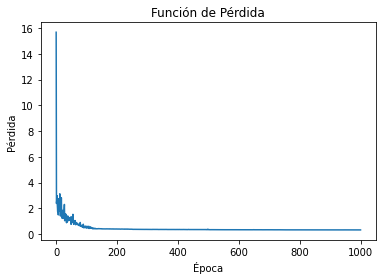

In [31]:
# Graficar la evolución de la función de pérdida
plt.plot(history.history['loss'])
plt.title('Función de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

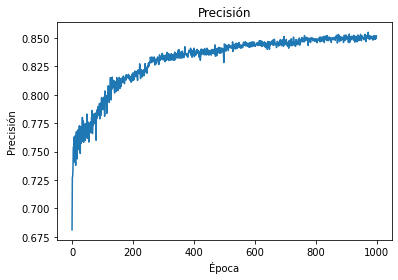

In [32]:
# Graficar la evolución de la métrica de evaluación (en este caso, precisión)
plt.plot(history.history['accuracy'])
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()

In [38]:
y_train

array([1, 0, 0, ..., 0, 0, 1])

In [40]:
import numpy as np
y_train_dual = []

for value in y_train:
    if value == 1:
        y_train_dual.append([1, 0])
    else:
        y_train_dual.append([0, 1])
y_train_dual = np.array(y_train_dual)
y_train_dual[0:5]

array([[1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [83]:
# Definimos el modelo de Keras
model = Sequential()
input_shape = len(X_train[0])
print('Numero de entradas:',input_shape)

model.add(Dense(int(len(X_train[0])), input_shape=(input_shape,), activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(int((len(X_train[0])/2)), activation='relu',kernel_initializer='he_uniform'))

# model.add(Dense((len(X_train[0])/2)/2, activation='relu',kernel_initializer='glorot_uniform'))

model.add(Dense(2, activation='softmax', kernel_initializer='glorot_uniform'))

model.summary()

Numero de entradas: 45
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 45)                2070      
                                                                 
 dense_38 (Dense)            (None, 22)                1012      
                                                                 
 dense_39 (Dense)            (None, 2)                 46        
                                                                 
Total params: 3,128
Trainable params: 3,128
Non-trainable params: 0
_________________________________________________________________


In [84]:
# compile the keras model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [85]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train_dual, epochs=1000, batch_size=32, callbacks=[lr_scheduler],use_multiprocessing=True)

Epoch 1/1000
118/118 [==============================] - 1s 2ms/step - loss: 8.1904 - accuracy: 0.6977 - lr: 0.0010
Epoch 2/1000
118/118 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.7401 - lr: 0.0010
Epoch 3/1000
118/118 [==============================] - 0s 2ms/step - loss: 0.7475 - accuracy: 0.7597 - lr: 0.0010
Epoch 4/1000
118/118 [==============================] - 0s 3ms/step - loss: 0.7903 - accuracy: 0.7658 - lr: 0.0010
Epoch 5/1000
118/118 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.7793 - lr: 0.0010
Epoch 6/1000
118/118 [==============================] - 0s 2ms/step - loss: 0.8105 - accuracy: 0.7658 - lr: 0.0010
Epoch 7/1000
118/118 [==============================] - 0s 2ms/step - loss: 1.0983 - accuracy: 0.7724 - lr: 0.0010
Epoch 8/1000
118/118 [==============================] - 0s 2ms/step - loss: 1.0612 - accuracy: 0.7668 - lr: 0.0010
Epoch 9/1000
118/118 [==============================] - 0s 3ms/step - loss: 0.73

In [86]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train_dual)
print('Accuracy: %.2f' % (accuracy*100))

118/118 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8381
Accuracy: 83.81


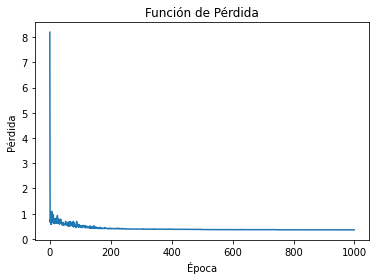

In [87]:
# Graficar la evolución de la función de pérdida
plt.plot(history.history['loss'])
plt.title('Función de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

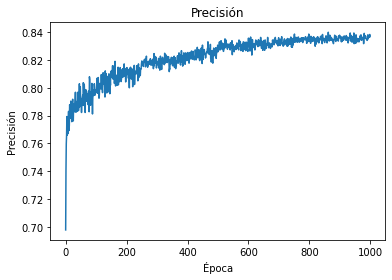

In [88]:
# Graficar la evolución de la métrica de evaluación (en este caso, precisión)
plt.plot(history.history['accuracy'])
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()